### Optimal Budget Allocation Strategy
#### Created by Ruchi Sharma for Optimization Project 01 Submission at UT Austin

##### Background

Marketing budgets now comprise 11 percent of total company budgets, based on a CMO survey sponsored by the Fuqua School of Business at Duke University, Deloitte LLP, and the American Marketing Association. However, the effectiveness of marketing varies significantly. One potential reason for such variation is the way of making marketing budget allocations. Namely, how much to invest in each advertisement platform. In this project, we use linear programming to build a simple marketing budget allocation strategy.

##### Specifics

The provided information and constraints are as follows:
1. Marketing budget of \$10 million.
2. The amount invested in print and TV advertising should be no more than the amount
spent on Facebook and Email.
3. The total amount used in social media should be at least twice of SEO and AdWords.
4. For each platform, the amount invested should be no more than $3M.

In [1]:
import numpy as np
import gurobipy as gp

In [2]:
# Reading csv

import pandas as pd
temp1 = pd.read_csv("ROI_data.csv", index_col = 0)

In [3]:
obj = np.array(temp1.iloc[0]) 
obj2 = np.array(temp1.iloc[1])

#### Task: Formulating the marketing budget allocation problem as a linear program. Using gurobi to find the optimal budget allocation.


Starting with reading in the ROI_data csv file in order to retrieve the data for marketing medium return percentages. Further, realiszing the required constraints to form the linear program. The code below taken into account the set objective function 'obj'. The aim is to maximize ROI by choosing the optimal allocation of the budget into each of the marketing mediums. 

In [4]:
# Objective Vector
# obj = np.array([0.031, 0.049, 0.024, 0.039, 0.016, 0.024, 0.046, 0.026, 0.033, 0.044])

# Constraint Matrix
A = np.zeros((13, 10))

A[0, :] = [1, 1, 0, 0, -1, 0, 0, 0, 0, -1]
A[1, :] = [0, 0, -2, -2, 1, 1, 1, 1, 1, 0]
A[2, :] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
A[3:13,0:10] = np.diag(np.ones(10)) 

# Limits 

b = np.array([0, 0, 10, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
sense = np.array(['<', '>', '<', '<', '<', '<', '<', '<', '<', '<', '<', '<', '<'])

In [5]:
# Initializing empty model
ojModel = gp.Model() 

# Specifying number of variables 
ojModX = ojModel.addMVar(10) 

# Adding constraints
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b)

# Add objective
ojModel.setMObjective(None, obj, 0, sense = gp.GRB.MAXIMIZE) 

ojModel.Params.OutputFlag = 0 
ojModel.Params.TimeLimit = 3600

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-17


In [6]:
ojModel.optimize()

In [7]:
ojModel.objVal

0.45600000000000007

In [8]:
ojModX.x

array([0., 3., 0., 1., 0., 0., 3., 0., 0., 3.])

From above, the following results can be noted:
1. Optimal ROI in dollars is 10,456,000
2. Allocation for each Marketing Medium: [0, 3, 0, 1, 0, 0, 3, 0, 0, 3]

##### Allocation across platforms - Case 1 

<BarContainer object of 10 artists>

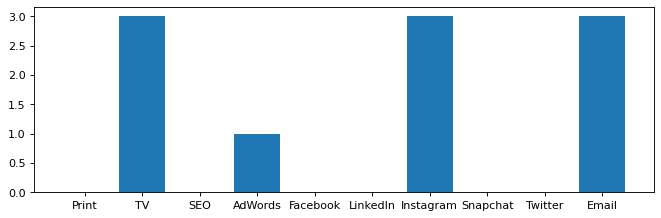

In [9]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 3), dpi=80)

plt.bar(['Print', 'TV', 'SEO', 'AdWords', 'Facebook', 'LinkedIn', 'Instagram', 'Snapchat', 'Twitter', 'Email'], 
        ojModX.x)

#### Task: Comparing with second set of ROI values. Setting up a new objective function and repeating the analysis as done previously. 

Using the same constraints and objectives as used previously to construct second model, except using the ROI values from the second row in the ROI_data csv dataset, Objective 'Obj2'.

In [10]:
# Setting the new Objective Function
# obj2 = np.array([0.049, 0.023, 0.024, 0.039, 0.044, 0.046, 0.026, 0.019, 0.037, 0.026])

ojModel2 = gp.Model() 
ojModX2 = ojModel2.addMVar(10) 

ojModCon2 = ojModel2.addMConstrs(A, ojModX2, sense, b)

ojModel2.setMObjective(None, obj2, 0, sense = gp.GRB.MAXIMIZE) 
ojModel2.Params.OutputFlag = 0 # tell gurobi to shut up!!
ojModel2.Params.TimeLimit = 3600

ojModel2.optimize()
ojModel2.objVal

0.45600000000000007

In [11]:
ojModX2.x

array([3., 0., 0., 1., 3., 3., 0., 0., 0., 0.])

From above, the following results can be noted:
1. Optimal ROI in dollars is 10,456,000
2. Allocation for each Marketing Medium: [3, 0, 0, 1, 3, 3, 0, 0, 0, 0]

##### Allocation across platforms - Case 2

<BarContainer object of 10 artists>

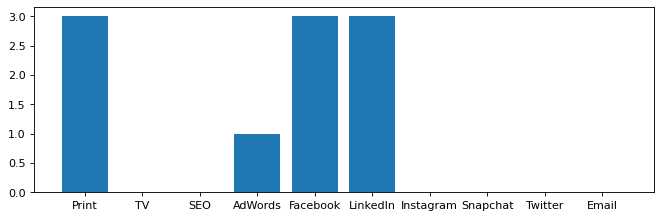

In [12]:
figure(figsize=(10, 3), dpi=80)
plt.bar(['Print', 'TV', 'SEO', 'AdWords', 'Facebook', 'LinkedIn', 'Instagram', 'Snapchat', 'Twitter', 'Email'], 
        ojModX2.x)

#### Task: Assuming the first ROI data is correct, and using the second allocation to see how much lower would the objective be relative to the optimal objective. 

In [13]:
ojModel.objVal - obj.dot(ojModel2.x)

0.20400000000000007

Both cases result in different allocations. Assuming the first ROI data is correct, using the second allocation the objective relative to the optimal objective is lower by $0.204 million.

#### Task: Assuming the second ROI data is correct, using the first allocation to see how much lower would the objective be relative to the optimal objective

In [14]:
ojModel2.objVal - obj2.dot(ojModel.x)

0.19200000000000006

Assuming the second ROI data is correct, using the first allocation the objective relative to the optimal objective is lower by $0.192 million.

Further analysis: The third constraint penalizes the value of all allocations to be less than $3M which seems feasible. In case of a higher limit, fewer variables could become more dominant while for a lower limit, the allocation could be more distributed leading to small investments across more channels. 

#### Task: Performing sensitivity analysis to analyze how the optimal allocation changes based on ROI data. 

Closely looking into the range in which each advertising medium’s ROI could increase or decrease but still result in the same optimal allocation as found earlier. 

In [15]:
ojModel = gp.Model() 
ojModX = ojModel.addMVar(10) 
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b)
ojModel.setMObjective(None, obj, 0, sense = gp.GRB.MAXIMIZE) 

ojModel.Params.OutputFlag = 0 
ojModel.Params.TimeLimit = 3600

ojModel.optimize()

# [con.Pi for con in ojModCon] 
# [con.SARHSLow for con in ojModCon]

In [16]:
[con.SARHSUp for con in ojModCon]

[0.0, 1.0, 10.5, inf, inf, inf, inf, inf, inf, 4.0, inf, inf, 3.0]

In [17]:
db = 10
ojModel.Objval + db*ojModCon[0].Pi

0.556

In [18]:
b2 = np.array([0+db, 0, 10, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

ojModel2 = gp.Model()
ojMod_x2 = ojModel2.addMVar(10) 
ojMod_con2 = ojModel2.addMConstrs(A, ojMod_x2, sense, b2) 
ojModel2.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)

ojModel2.Params.OutputFlag = 0
ojModel2.optimize()

ojModel2.Objval

0.45600000000000007

In [19]:
ojModX.SAObjLow

array([ -inf, 0.039,  -inf, 0.033,  -inf,  -inf, 0.039,  -inf,  -inf,
       0.029])

In [20]:
ojModX.SAObjUp

array([0.049, 0.062, 0.039, 0.046, 0.029, 0.039,   inf, 0.039, 0.039,
         inf])

#### Task: Your boss has gained permission to reinvest half of the return. What is the optimal allocation for each month?

In [21]:
import pandas as pd

roi = pd.read_csv("roi_mat.csv",index_col = "Unnamed: 0") / 100

# initialize constraint matrix

A = np.ones((3, 10))  # inital A with 1

A[0, :] = [1., 1, 0, 0, -1, 0, 0, 0, 0, -1]
A[1, :] = [0, 0, -2., -2, 1, 1, 1, 1, 1, 0]

roi_data_months = roi

optimal_allocation = roi_data_months.copy()

# display(roi)

ub = np.array([3.]*10)
b = np.array([0, 0, 10.])

sense = np.array(['<', '>', '='])  # liability constraint

print("Returns: ")
returns = []

for i in range(roi_data_months.shape[0]):
    obj = np.array(roi_data_months.iloc[i][:])  # setup objective vector
    ojModel = gp.Model()  # initialize an empty model
    
    ojModX = ojModel.addMVar(10, ub=ub)
    ojModCon = ojModel.addMConstrs(A, ojModX, sense, b)
    
    ojModel.setMObjective(None, obj, 0, sense=gp.GRB.MAXIMIZE)
    ojModel.Params.OutputFlag = 0  # tell gurobi to shut up!!
    ojModel.optimize()  # solve the LP
    
    #adjust the amount to be invested
    optimal_allocation.iloc[i,:] = ojModX.x
    
    b[2]= 10 + np.dot(ojModX.x,obj)/2.
    
    # print(np.dot(ojModX.x,obj))
    print(i+1, ojModel.objVal)
    returns.append(ojModel.objVal)

# optimal_allocation

Returns: 
1 0.373
2 0.40629600000000005
3 0.407516476
4 0.40033529656800004
5 0.41100586768993996
6 0.4238091114861089
7 0.4282642776739791
8 0.4379935498311536
9 0.40271237905933416
10 0.37144339806494936
11 0.4416145896603315
12 0.43250108085096145


##### Plot of Returns obtained across Months

<BarContainer object of 12 artists>

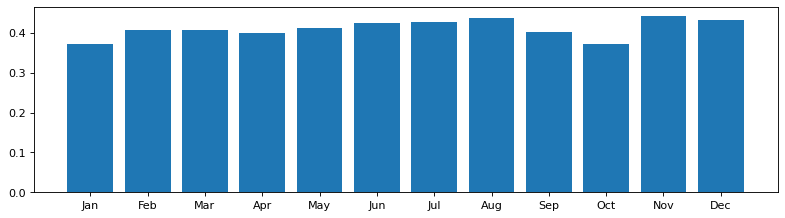

In [22]:
figure(figsize=(12, 3), dpi=80)
plt.bar(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],  
        returns)

In [23]:
optimal_allocation

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
January,3.000000,0.000000,0.0,1.333333,0.000000,0.0,2.666667,0.0,0.000000,3.000000
February,3.000000,0.000000,0.0,2.395500,3.000000,0.0,0.000000,0.0,1.791000,0.000000
March,0.000000,0.000000,0.0,3.000000,0.000000,3.0,1.203148,0.0,3.000000,0.000000
April,0.000000,0.000000,0.0,3.000000,0.000000,3.0,3.000000,0.0,1.203758,0.000000
May,1.200168,0.000000,0.0,0.000000,0.000000,0.0,3.000000,0.0,3.000000,3.000000
June,3.000000,0.000000,0.0,0.000000,0.000000,0.0,3.000000,0.0,1.205503,3.000000
July,0.000000,0.000000,0.0,3.000000,1.211905,0.0,3.000000,0.0,3.000000,0.000000
August,2.714132,0.000000,0.0,1.500000,0.000000,0.0,0.000000,0.0,3.000000,3.000000
September,0.609498,0.000000,0.0,3.000000,0.000000,3.0,0.000000,0.0,3.000000,0.609498
October,0.000000,0.000000,0.0,3.000000,0.000000,3.0,3.000000,0.0,0.000000,1.201356


###### End of Code.